# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [4]:
# Create Empty Lists
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beginning Data Retrieval ")
print('-----------------------------')

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print('-----------------------------')
print("Data Retrieval Complete")
print('-----------------------------')

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : vaini
Processing Record 2 of Set 1 : new norfolk
City not found. Skipping...
Processing Record 3 of Set 1 : kapaa
Processing Record 4 of Set 1 : busselton
Processing Record 5 of Set 1 : touros
Processing Record 6 of Set 1 : tazovskiy
Processing Record 7 of Set 1 : bredasdorp
Processing Record 8 of Set 1 : general roca
Processing Record 9 of Set 1 : kapuskasing
Processing Record 10 of Set 1 : atuona
Processing Record 11 of Set 1 : asau
Processing Record 12 of Set 1 : kendari
Processing Record 13 of Set 1 : quang ngai
Processing Record 14 of Set 1 : ushuaia
Processing Record 15 of Set 1 : mataura
Processing Record 16 of Set 1 : rio grande
Processing Record 17 of Set 1 : ribeira grande
Processing Record 18 of Set 1 : tiznit
Processing Record 19 of Set 1 : mogadishu
Processing Record 20 of Set 1 : ust-kut
Processing Record 21 of Set 1 : gairatganj
Processing Record 22 of Set 1 : dryden
Processing Record 

Processing Record 32 of Set 4 : japura
Processing Record 33 of Set 4 : minab
Processing Record 34 of Set 4 : peniche
Processing Record 35 of Set 4 : pangkalanbuun
Processing Record 36 of Set 4 : medina
Processing Record 37 of Set 4 : bandundu
Processing Record 38 of Set 4 : hualmay
Processing Record 39 of Set 4 : svetlaya
Processing Record 40 of Set 4 : taltal
Processing Record 41 of Set 4 : phan thiet
Processing Record 42 of Set 4 : norman wells
Processing Record 43 of Set 4 : geraldton
Processing Record 44 of Set 4 : thunder bay
Processing Record 45 of Set 4 : lendinara
Processing Record 46 of Set 4 : flinders
Processing Record 47 of Set 4 : san vicente
City not found. Skipping...
Processing Record 48 of Set 4 : yamada
Processing Record 49 of Set 4 : baie-saint-paul
Processing Record 50 of Set 4 : yarmouth
Processing Record 0 of Set 5 : luanda
Processing Record 1 of Set 5 : moerai
Processing Record 2 of Set 5 : saint-augustin
Processing Record 3 of Set 5 : aklavik
City not found. Ski

Processing Record 15 of Set 8 : port lincoln
Processing Record 16 of Set 8 : klyuchi
Processing Record 17 of Set 8 : kiunga
City not found. Skipping...
Processing Record 18 of Set 8 : berlevag
Processing Record 19 of Set 8 : grass valley
Processing Record 20 of Set 8 : bima
Processing Record 21 of Set 8 : canakkale
Processing Record 22 of Set 8 : olinda
Processing Record 23 of Set 8 : korla
Processing Record 24 of Set 8 : sur
Processing Record 25 of Set 8 : moron de la frontera
Processing Record 26 of Set 8 : blenheim
City not found. Skipping...
Processing Record 27 of Set 8 : vila velha
City not found. Skipping...
Processing Record 28 of Set 8 : dakar
Processing Record 29 of Set 8 : kudahuvadhoo
Processing Record 30 of Set 8 : sabaudia
Processing Record 31 of Set 8 : darnah
Processing Record 32 of Set 8 : rudnogorsk
Processing Record 33 of Set 8 : san isidro
Processing Record 34 of Set 8 : flagstaff
Processing Record 35 of Set 8 : kirensk
Processing Record 36 of Set 8 : port hardy
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create DataFrame
df_weather = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})

In [7]:
# Export the city data into a .csv.
df_weather.to_csv("../Resources/weather.csv", index=False)

# Show count of city rows
df_weather.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [8]:
# Display the DataFrame
df_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,75.36,88,90,8.05,TO,1633288925
1,New Norfolk,-42.7826,147.0587,53.74,82,49,1.28,AU,1633288925
2,Kapaa,22.0752,-159.3190,80.58,83,90,3.00,US,1633288926
3,Busselton,-33.6500,115.3333,41.09,67,87,3.58,AU,1633288927
4,Touros,-5.1989,-35.4608,85.10,65,15,17.25,BR,1633288927


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
df_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,20.779641,17.127390,64.021688,71.245872,57.719266,8.165560,1.633289e+09
std,33.525992,91.597254,19.520833,20.836154,40.432634,6.384271,9.780815e+01
min,-54.800000,-179.166700,12.520000,8.000000,0.000000,0.000000,1.633289e+09
25%,-6.091100,-62.056900,50.560000,61.000000,15.000000,3.560000,1.633289e+09
50%,25.286700,18.423200,67.010000,75.000000,75.000000,6.550000,1.633289e+09
75%,49.712700,99.132800,79.390000,87.000000,99.000000,10.740000,1.633289e+09
max,78.218600,179.316700,103.320000,100.000000,100.000000,40.220000,1.633289e+09


In [10]:
df_weather['Humidity'].max()

100

In [11]:
#  Get the indices of cities that have humidity over 100%.
df_weather[df_weather['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Latitude and Temperature are normally distributed

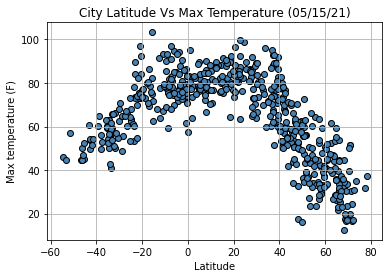

In [13]:
# create axis 
x_value1 = df_weather["Lat"]
y_value1 = df_weather["Max Temp"]

# Generate a scatter plot of Latitude vs. Temperature
fig1, ax1 = plt.subplots()
ax1.scatter(x_value1, y_value1, color = "steelblue", edgecolor = "black")
ax1.grid()
ax1.set(
       title="City Latitude Vs Max Temperature (05/15/21)",
       xlabel="Latitude",
       ylabel="Max temperature (F)");

plt.savefig("../Weather_graphs/LatvsTemp.png")

## Latitude vs. Humidity Plot

There is no linear relationship between latitude and humidity nad most of the city has high humidity.

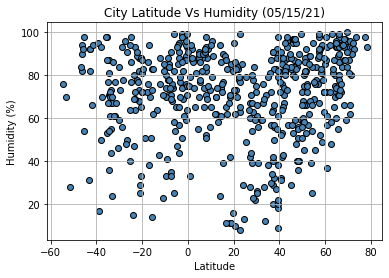

In [14]:
# create axis 
x_value2 = df_weather["Lat"]
y_value2 = df_weather["Humidity"]

# Generate a scatter plot of Latitude vs. Humidity
fig2, ax2 = plt.subplots()
ax2.scatter(x_value2, y_value2, color = "steelblue", edgecolor = "black")
ax2.grid()
ax2.set(
       title="City Latitude Vs Humidity (05/15/21)",
       xlabel="Latitude",
       ylabel="Humidity (%)");

plt.savefig("../Weather_graphs/LatvsHum.png")

## Latitude vs. Cloudiness Plot

cloudiness is evently distributded regardless of the city latitude

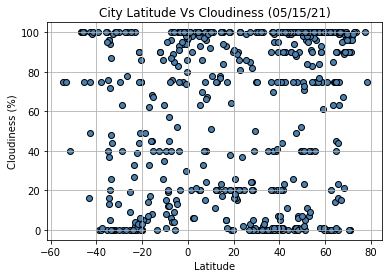

In [15]:
# create axis 
x_value3 = df_weather["Lat"]
y_value3 = df_weather["Cloudiness"]

# Generate a scatter plot of Latitude vs. Cloudiness
fig3, ax3 = plt.subplots()
ax3.scatter(x_value3, y_value3, color = "steelblue", edgecolor = "black")
ax3.grid()
ax3.set(
       title="City Latitude Vs Cloudiness (05/15/21)",
       xlabel="Latitude",
       ylabel="Cloudiness (%)");

plt.savefig("../Weather_graphs/LatvsCloud.png")

## Latitude vs. Wind Speed Plot

most of the city has low wind speed and there is no linear-relationship between city latitude and wind speed

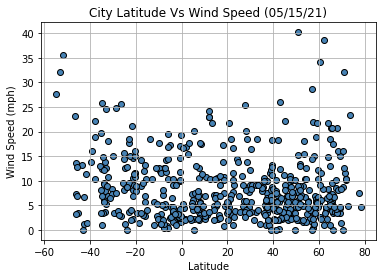

In [16]:
# create axis 
x_value4 = df_weather["Lat"]
y_value4 = df_weather["Wind Speed"]

# Generate a scatter plot of Latitude vs. Wind Speed
fig4, ax4 = plt.subplots()
ax4.scatter(x_value4, y_value4, color = "steelblue", edgecolor = "black")
ax4.grid()
ax4.set(
       title="City Latitude Vs Wind Speed (05/15/21)",
       xlabel="Latitude",
       ylabel="Wind Speed (mph)");

plt.savefig("../Weather_graphs/LatvsWindSpd.png")

## Linear Regression

In [17]:
# Create Linear Regression Function
def linear_regression(df, y_column, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
# Create Northern and Southern Hemisphere DataFrames
df_north_hem = df_weather.loc[df_weather['Lat'] > 0, :]
df_south_hem = df_weather.loc[df_weather['Lat'] < 0, :]

The r-squared is: -0.8195264893925274


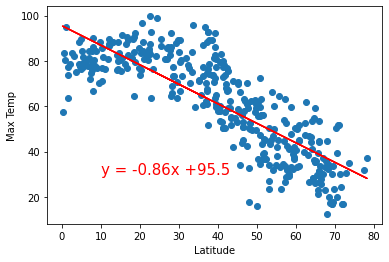

In [19]:
linear_regression(df_north_hem, 'Max Temp', 'Max Temp', '../Weather_graphs/NorthHem_TempvsLat_LinReg.png', (10,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7646528794194101


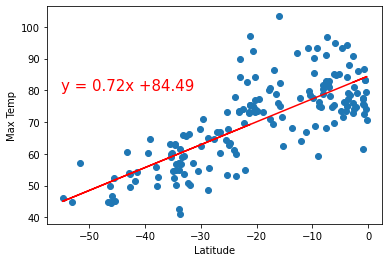

In [20]:
linear_regression(df_south_hem, 'Max Temp', 'Max Temp', '../Weather_graphs/SouthHem_TempvsLat_LinReg.png', (-55,80))

Nothern Hemispher's temperature and latitude are negatively correlated while Southern Hemispehre's latitud and max temperature are positively correlated. Additinaly, around 87% of variaces can be explained by Nothern Hemispher's regression model. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16416987523780063


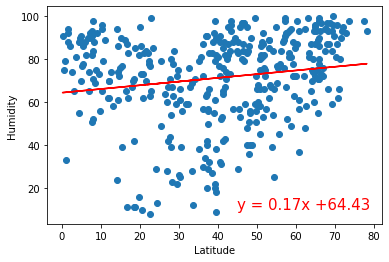

In [21]:
linear_regression(df_north_hem, 'Humidity', 'Humidity', '../Weather_graphs/NorthHem_HumvsLat_LinReg.png', (45,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0549274943867658


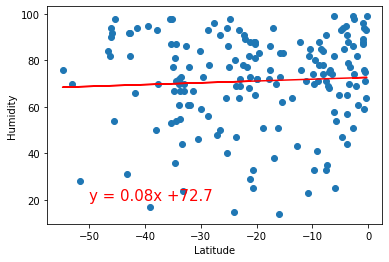

In [22]:
linear_regression(df_south_hem, 'Humidity', 'Humidity', '../Weather_graphs/SouthHem_HumvsLat_LinReg.png', (-50,20))

There are no specific correlations between latitude and humidity in both the northern and southern hemisphere and the r-squared are very low in both.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0919980308882579


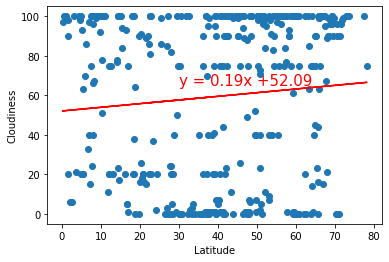

In [23]:
linear_regression(df_north_hem, 'Cloudiness', 'Cloudiness', '../Weather_graphs/NorthHem_CloudvsLat_LinReg.png', (30,65))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08576034679634141


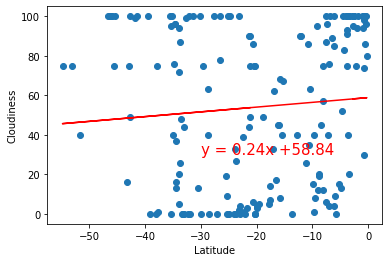

In [27]:
linear_regression(df_south_hem, 'Cloudiness', 'Cloudiness', '../Weather_graphs/SouthHem_CloudvsLat_LinReg.png', (-30,30))

There are no specific correlations between coludiness and latitude in both the northern and southern hemisphere and the r-squared are very low in both.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05674830514924772


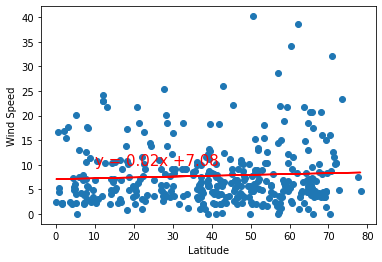

In [33]:
linear_regression(df_north_hem, 'Wind Speed', 'Wind Speed', '../Weather_graphs/NorththHem_WindspeedvsLat_LinReg.png', (10,10))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.33900094857606905


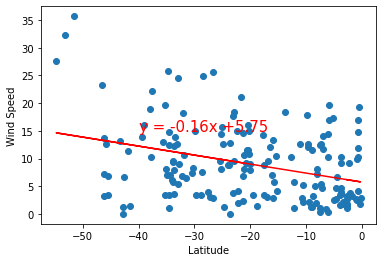

In [36]:
linear_regression(df_south_hem, 'Wind Speed', 'Wind Speed', '../Weather_graphs/SouththHem_WindspeedvsLat_LinReg.png', (-40,15))

In [ ]:
While there is some negative correlation between wind speed and latitude 